In [1]:
import os
import pandas as pd

# Define the path to the STA file
folder_path = "Nepal/Nepal/Nepal 2022/NP_2022_DHS_11092023_2251_202866/NPHR82DT"
file_name = "NPHR82FL.DTA"
sta_file_path = os.path.join(folder_path, file_name)

# Check if the file exists
if os.path.exists(sta_file_path):
    # Read the STA file into a pandas DataFrame
    df = pd.read_stata(sta_file_path)
    
    # Display information about the DataFrame
    print("DataFrame Info:")
    print(df.info())
    
    # Display the DataFrame
    print("\nContents of the STA file:")
    print(df)
else:
    print(f"The file {file_name} does not exist in the specified folder.")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13786 entries, 0 to 13785
Columns: 3027 entries, hhid to hai13z_5
dtypes: category(2659), float64(319), int16(13), int32(4), int8(15), object(17)
memory usage: 73.2+ MB
None

Contents of the STA file:
               hhid hv000  hv001  hv002 hv003  hv004   hv005  hv006  hv007  \
0             1   1   NP8      1      1     1      1  934601   magh   2078   
1             1   6   NP8      1      6     1      1  934601   magh   2078   
2             1   8   NP8      1      8     1      1  934601   magh   2078   
3             1   9   NP8      1      9     2      1  934601   magh   2078   
4             1  11   NP8      1     11     4      1  934601   magh   2078   
...             ...   ...    ...    ...   ...    ...     ...    ...    ...   
13781       476 132   NP8    476    132     1    476  481982  poush   2078   
13782       476 137   NP8    476    137     1    476  481982  poush   2078   
13783       476 142   NP8    47

In [13]:
new_df = df[["shecoreg", "hv009", "hv216"]].copy()
new_df

,shecoreg,hv009,hv216
0,mountain,7,2
1,mountain,2,1
2,mountain,7,2
3,mountain,6,2
4,mountain,6,3
...,...,...,...
13781,terai,5,2
13782,terai,3,3
13783,terai,4,3
13784,terai,4,2


In [14]:
new_df["RoomProp"] = new_df["hv009"]/new_df["hv216"]
new_df

,shecoreg,hv009,hv216,RoomProp
0,mountain,7,2,3.500000
1,mountain,2,1,2.000000
2,mountain,7,2,3.500000
3,mountain,6,2,3.000000
4,mountain,6,3,2.000000
...,...,...,...,...
13781,terai,5,2,2.500000
13782,terai,3,3,1.000000
13783,terai,4,3,1.333333
13784,terai,4,2,2.000000


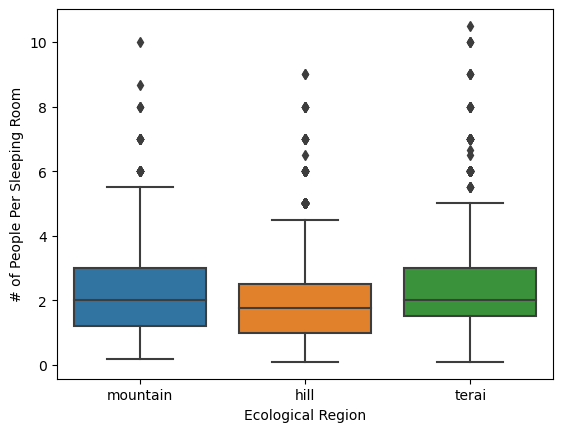

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a seaborn boxplot
sns.boxplot(x='shecoreg', y='RoomProp', data=new_df)

# Set labels and title
plt.xlabel('Ecological Region')
plt.ylabel('# of People Per Sleeping Room')

# Show the plot
plt.show()

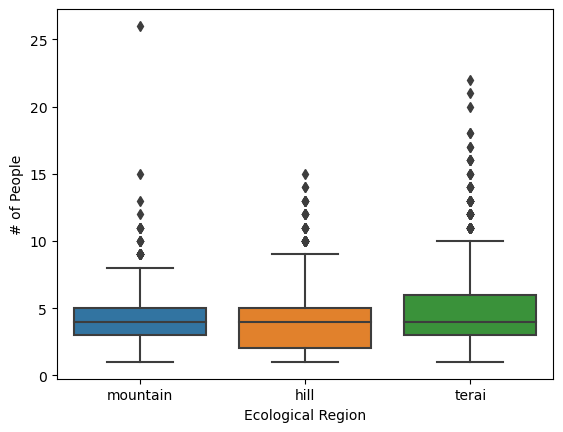

In [5]:
# Create a seaborn boxplot
sns.boxplot(x='shecoreg', y='hv009', data=new_df)

# Set labels and title
plt.xlabel('Ecological Region')
plt.ylabel('# of People')

# Show the plot
plt.show()

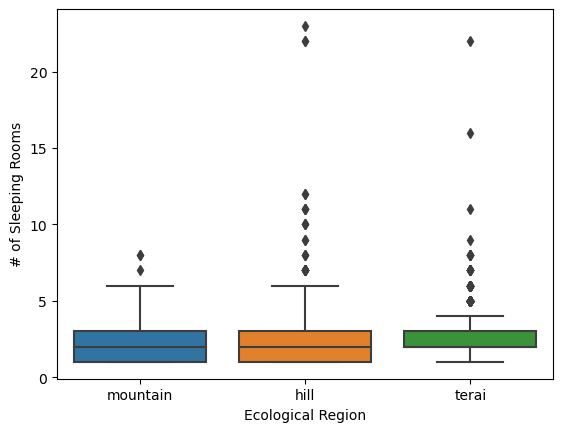

In [9]:
# Create a seaborn boxplot
sns.boxplot(x='shecoreg', y='hv216', data=new_df)

# Set labels and title
plt.xlabel('Ecological Region')
plt.ylabel('# of Sleeping Rooms')

# Show the plot
plt.show()

In [11]:
df2 = df[["hv009","hv216","hv014"]].copy()
df2

,hv009,hv216,hv014
0,7,2,1
1,2,1,0
2,7,2,2
3,6,2,1
4,6,3,1
...,...,...,...
13781,5,2,1
13782,3,3,0
13783,4,3,1
13784,4,2,1


In [12]:
df2["NumAdults"] = df2["hv009"] - df2["hv014"]
df2

,hv009,hv216,hv014,NumAdults
0,7,2,1,6
1,2,1,0,2
2,7,2,2,5
3,6,2,1,5
4,6,3,1,5
...,...,...,...,...
13781,5,2,1,4
13782,3,3,0,3
13783,4,3,1,3
13784,4,2,1,3


In [13]:
df2["hv014"].describe()

count    13786.000000
mean         0.458654
std          0.724359
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: hv014, dtype: float64

In [9]:
new_df["shecoreg"].value_counts()

shecoreg
hill        6693
terai       5828
mountain    1265
Name: count, dtype: int64

In [15]:
new_df.drop(new_df[new_df["shecoreg"] == "mountain"].index, inplace=True)

In [16]:
new_df["shecoreg"].value_counts()

shecoreg
hill        6693
terai       5828
mountain       0
Name: count, dtype: int64

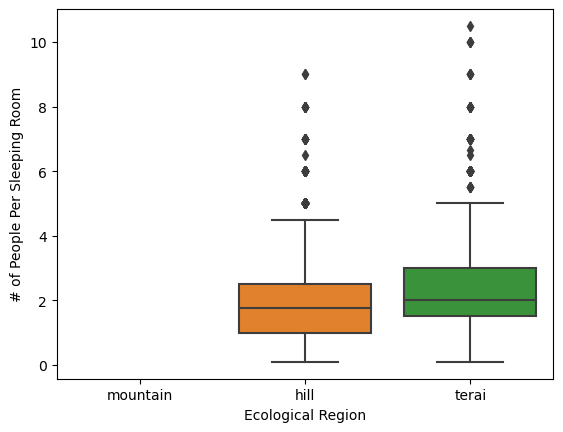

In [17]:
# Create a seaborn boxplot
sns.boxplot(x='shecoreg', y='RoomProp', data=new_df)

# Set labels and title
plt.xlabel('Ecological Region')
plt.ylabel('# of People Per Sleeping Room')

# Show the plot
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preprocessing
# Assuming there are no missing values and RoomProp is numerical

# Encode categorical variables (if any)
# If "shecoreg" is categorical, you may need to encode it (e.g., using LabelEncoder)

# Split the data into features (X) and target variable (y)
X = new_df[["RoomProp"]]
y = new_df["shecoreg"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Step 2: Choose a Classification Algorithm
model = RandomForestClassifier()

# Step 3: Train the Model
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Step 5: Fine-tune the Model (if needed)
# You may want to adjust hyperparameters or try different algorithms based on performance.

# Step 6: Make Predictions
# You can now use the trained model to make predictions on new data.


Accuracy: 0.56
              precision    recall  f1-score   support

        hill       0.57      0.79      0.66      1360
       terai       0.53      0.29      0.37      1145

    accuracy                           0.56      2505
   macro avg       0.55      0.54      0.52      2505
weighted avg       0.55      0.56      0.53      2505



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preprocessing
# Assuming there are no missing values, but we'll scale RoomProp for better model performance.

# Encode categorical variables (if any)
# If "shecoreg" is categorical, you may need to encode it (e.g., using LabelEncoder)

# Split the data into features (X) and target variable (y)
X = new_df[["RoomProp"]]
y = new_df["shecoreg"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the "RoomProp" feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Choose a Classification Algorithm
model = RandomForestClassifier()

# Step 3: Train the Model
model.fit(X_train_scaled, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Step 5: Fine-tune the Model (if needed)
# You may want to adjust hyperparameters or try different algorithms based on performance.

# Step 6: Make Predictions
# You can now use the trained model to make predictions on new data.


Accuracy: 0.56
              precision    recall  f1-score   support

        hill       0.55      0.86      0.67      1313
       terai       0.59      0.22      0.32      1192

    accuracy                           0.56      2505
   macro avg       0.57      0.54      0.50      2505
weighted avg       0.57      0.56      0.50      2505



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import zscore

# Step 1: Data Preprocessing
# Assuming there are no missing values, but we'll scale RoomProp and remove outliers.

# Encode categorical variables (if any)
# If "shecoreg" is categorical, you may need to encode it (e.g., using LabelEncoder)

# Split the data into features (X) and target variable (y)
X = new_df[["RoomProp"]]
y = new_df["shecoreg"]

# Identify and remove outliers using z-score
z_scores = zscore(X)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the "RoomProp" feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Choose a Classification Algorithm
model = RandomForestClassifier()

# Step 3: Train the Model
model.fit(X_train_scaled, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Step 5: Fine-tune the Model (if needed)
# You may want to adjust hyperparameters or try different algorithms based on performance.

# Step 6: Make Predictions
# You can now use the trained model to make predictions on new data.


Accuracy: 0.56
              precision    recall  f1-score   support

        hill       0.57      0.77      0.65      1334
       terai       0.53      0.30      0.39      1128

    accuracy                           0.56      2462
   macro avg       0.55      0.54      0.52      2462
weighted avg       0.55      0.56      0.53      2462



In [22]:
from sklearn.model_selection import GridSearchCV

# Step 5: Fine-tune the Model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Step 6: Make Predictions
y_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.5558726314789811
Tuned Model Accuracy: 0.56
              precision    recall  f1-score   support

        hill       0.57      0.77      0.65      1334
       terai       0.53      0.30      0.39      1128

    accuracy                           0.56      2462
   macro avg       0.55      0.54      0.52      2462
weighted avg       0.55      0.56      0.53      2462



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preprocessing
# Assuming there are no missing values and RoomProp is numerical

# Encode categorical variables (if any)
# If "shecoreg" is categorical, you may need to encode it (e.g., using LabelEncoder)

# Split the data into features (X) and target variable (y)
X = new_df[["hv216", "hv009"]]
y = new_df["shecoreg"]

# Identify and remove outliers using z-score
z_scores = zscore(X)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the "RoomProp" feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Choose a Classification Algorithm
model = RandomForestClassifier()

# Step 3: Train the Model
model.fit(X_train_scaled, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Step 5: Fine-tune the Model (if needed)
# You may want to adjust hyperparameters or try different algorithms based on performance.

# Step 6: Make Predictions
# You can now use the trained model to make predictions on new data.

Accuracy: 0.57
              precision    recall  f1-score   support

        hill       0.57      0.84      0.68      1303
       terai       0.60      0.27      0.37      1149

    accuracy                           0.57      2452
   macro avg       0.58      0.56      0.52      2452
weighted avg       0.58      0.57      0.53      2452

